In [8]:
import pandas as pd
import random
import matplotlib.pyplot as plt 
import numpy as np 
from visibility_graph import visibility_graph
import networkx as nx
import statsmodels.api as sm
import os

ruta = '../SN/'
title = 'SN'
edge = '../SN/edgeList/'


if not os.path.exists(ruta):
    os.makedirs(ruta)

if not os.path.exists(edge):
    os.makedirs(edge)

In [2]:
def lista0 (lista1, lista2):
    while 0 in lista1:
        lista2.pop(lista1.index(0))
        lista1.remove(0)
    return lista1, lista2 

def get_alpha(route,id, li_fit, ls_fit, xlimi, xlims, color, name):
    
    data = f'{route}{id}'
    routeSaved = f'{route}pdf_{title}/'

    if not os.path.exists(routeSaved):
        os.makedirs(routeSaved)

    #manejo del grafo y grados.
    G = nx.read_edgelist(data,nodetype=int) # leemos el grafo
    degree_count =  nx.degree_histogram(G) 
    degrees = list(range(0, len(degree_count)))

    degree_count, degrees = lista0(degree_count, degrees)
    
    #Normalize the degree distribution
    degree_distribution = [count/float(sum(degree_count)) for count in degree_count]
    x0,y0=np.array(np.log10(degrees)),np.array(np.log10(degree_distribution))
    x,y=x0[(x0>=li_fit)&(x0<=ls_fit)],y0[(x0>=li_fit)&(x0<=ls_fit)]


    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()

    # Plot degree distribution
    a=np.linspace(li_fit,ls_fit,10)
    

    plt.figure(figsize=(6,4))
    plt.plot(x0,y0,color=color,linewidth=0,marker="P",markersize=5,label="data")
    plt.plot(a,(a)*(model.params[1])+model.params[0]*1.,color="k",lw=3,label=r"fit ($\alpha_0={}$)".format(-np.round(model.params[1],2)))
    plt.xlabel(r'$\log_{10}(k)$ (Degree)'); plt.ylabel(r'$\log_{10} P(k)$'); plt.title('Degree Distribution {}'.format(name)); plt.legend(); plt.xlim(xlimi,xlims)
    plt.legend(title=r"$P(k)\sim x^{-\alpha_0}$"); plt.grid(alpha=0.5)
    plt.savefig(routeSaved+f'{id}.pdf',dpi=400,bbox_inches='tight')
    plt.show()

    return

In [3]:
sn = pd.read_csv('../transients/SN.csv')
sn


,Classification,ID,observation_id,Mag,Magerr,MJD
0,SN,912161350334131339,104101,19.0104,0.179763,53765.208044
1,SN,912161350334131339,104160,19.3373,0.191561,54564.123323
2,SN,912161350334131339,104161,19.1652,0.176900,54564.129862
3,SN,912161350334131339,104162,19.2277,0.182531,54564.136463
4,SN,912161350334131339,104038,19.0825,0.172369,53725.405592
...,...,...,...,...,...,...
17015,SN,1106241070834132854,298016,17.6406,0.102165,54213.442305
17016,SN,1510161150164123038,53657,19.1470,0.190008,55888.158696
17017,SN,1106241070834132854,298015,17.7099,0.104412,54213.434484
17018,SN,1106241070834132854,298014,17.5632,0.099456,54213.426671


In [10]:
ids = list(sn['ID'].unique())
print(len(list(sn['ID'].unique())))
sn['ID'].unique()

49


array([ 912161350334131339, 1306081320774122613, 1211121150034142136,
       1001121180684103058, 1001081010654134912, 1304211180774111949,
       1005211180714134371, 1211141090484136131, 1212121040124143985,
       1002171400444123118, 1206201040754130670, 1003171260614126522,
       1409141260394124755, 1301161230184124892, 1310091091244132305,
       1208251011194110586, 1011101350374137703, 1012111350464134032,
        907301180164117377, 1406281290794116040, 1005131040794117717,
       1212121380464142104, 1301200010614127750, 1408310011164108034,
       1203281180644135630, 1003211320514111504, 1103081210694128465,
       1501241090754108157, 1111281150614125119, 1603271180634114884,
       1603071260674122066, 1605081070454144230, 1608291180064102809,
       1608311070894114808, 1609030071214116517, 1610111070074115832,
       1203221400724152974, 1104141070804123992, 1501241180614140311,
       1502271350474110786, 1203270010604115428, 1512091151214142650,
       1510161150164

##### Función para hacer los datos

In [11]:
#funcion que haga eso de forma automatica

def edgelist(id):
    vec_id = sn[sn['ID'] == id]['Mag']
    graph_id = visibility_graph(vec_id)
    nx.write_edgelist(graph_id, f'{ruta}edgeList/{id}')


In [6]:
def get_alpha_data(route,id, li_fit, ls_fit, name):
    
    data = f'{edge}{id}'
    
    #manejo del grafo y grados.
    G = nx.read_edgelist(data,nodetype=int) # leemos el grafo
    degree_count =  nx.degree_histogram(G) 
    degrees = list(range(0, len(degree_count)))

    degree_count, degrees = lista0(degree_count, degrees)
    
    #Normalize the degree distribution
    degree_distribution = [count/float(sum(degree_count)) for count in degree_count]
    x0,y0=np.array(np.log10(degrees)),np.array(np.log10(degree_distribution))
    x,y=x0[(x0>=li_fit)&(x0<=ls_fit)],y0[(x0>=li_fit)&(x0<=ls_fit)]


    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()

    alpha = -np.round(model.params[1],2)
    values = [name,id,alpha]
    
    return values

In [13]:
values = []
for id in ids:
    values.append(get_alpha_data(edge, id, 0.77, 1.393, 'SN')) 

print(values)

[['SN', 912161350334131339, 2.63], ['SN', 1306081320774122613, 2.28], ['SN', 1211121150034142136, 2.48], ['SN', 1001121180684103058, 2.75], ['SN', 1001081010654134912, 2.86], ['SN', 1304211180774111949, 2.69], ['SN', 1005211180714134371, 2.07], ['SN', 1211141090484136131, 2.2], ['SN', 1212121040124143985, 2.77], ['SN', 1002171400444123118, 1.99], ['SN', 1206201040754130670, 2.65], ['SN', 1003171260614126522, 2.36], ['SN', 1409141260394124755, 2.24], ['SN', 1301161230184124892, 2.53], ['SN', 1310091091244132305, 3.17], ['SN', 1208251011194110586, 2.54], ['SN', 1011101350374137703, 2.44], ['SN', 1012111350464134032, 2.88], ['SN', 907301180164117377, 2.72], ['SN', 1406281290794116040, 2.54], ['SN', 1005131040794117717, 2.47], ['SN', 1212121380464142104, 2.57], ['SN', 1301200010614127750, 2.39], ['SN', 1408310011164108034, 2.34], ['SN', 1203281180644135630, 2.42], ['SN', 1003211320514111504, 2.22], ['SN', 1103081210694128465, 2.49], ['SN', 1501241090754108157, 2.54], ['SN', 111128115061412

In [14]:
import csv 

ruta = '../resultados/prueba.csv'

with open (ruta, mode = 'a', newline = '') as archivo: 
    writer = csv.writer(archivo)

    writer.writerows(values)
    pass

In [13]:
import random

# Define tu lista

# Obtén una muestra aleatoria de tamaño 5 sin repeticiones
muestra_aleatoria = random.sample(ids, 15)

# Imprime la muestra aleatoria
print("Muestra aleatoria sin repeticiones:", muestra_aleatoria)

Muestra aleatoria sin repeticiones: [1610111070074115832, 1510161150164123038, 1106241070834132854, 1603271180634114884, 1306211120664110566, 1212121040124143985, 1106091210774115315, 1603071260674122066, 1211141090484136131, 1203281180644135630, 1501241180614140311, 1212121380464142104, 1409141260394124755, 1512091151214142650, 1104141070804123992]


#### Indices de los id's a probar (sacado aleatoreamente)

id1: 13

id2: 36

id3: 44

id4: 29

id5: 18

In [12]:

ids_group = [1610111070074115832, 1510161150164123038, 1106241070834132854, 1603271180634114884, 1306211120664110566,
              1212121040124143985, 1106091210774115315, 1603071260674122066, 1211141090484136131, 1203281180644135630,
                1501241180614140311, 1212121380464142104, 1409141260394124755, 1512091151214142650, 1104141070804123992]


""" id1 = 1301161230184124892
id2 = 1203221400724152974
id3 = 1106091210774115315
id4 = 1603271180634114884
id5 = 907301180164117377


edgelist(id1)
edgelist(id2)
edgelist(id3)
edgelist(id4)
edgelist(id5)

#TODO: Realizar las pruebas de la 2 en adelante """

for _ in ids:
    edgelist(_)

In [100]:
values_min = [0.78, 0.78, 0.75, 0.79, 0.80, 0.79, 0.72, 0.84, 0.76, 0.75, 0.71, 0.75, 0.76, 0.77, 0.80]
values_max = [1.38, 1.39, 1.45, 1.34, 1.35, 1.32, 1.39, 1.31, 1.50, 1.41, 1.39, 1.38, 1.47, 1.43, 1.38]
values_alpha = [2.45, 2.42, 2.28, 2.8, 2.85, 2.86, 2.36, 3.34, 2.18, 2.42, 2.5, 2.57, 2.24, 2.38, 2.54]
print(len(values_alpha))

15


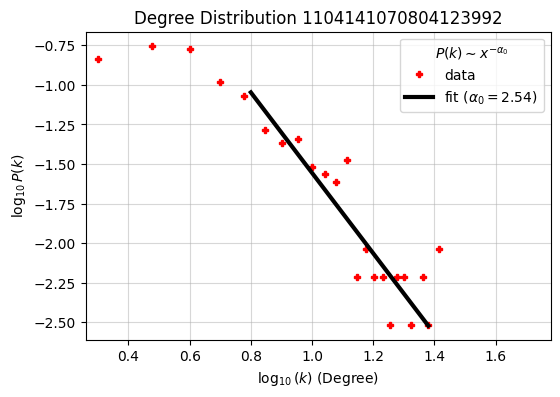

In [99]:
#3 -> get_alpha(ruta, id4, 0.76 ,1.34,0.26,1.78, "red", id4)
#6 -> get_alpha(ruta, id3, 0.85 ,1.39,0.26,1.78, "red", id3)
get_alpha(ruta, ids_group[14], 0.80, 1.38,0.26,1.78, "red", ids_group[14])

#### PRUEBA 1 $\rightarrow$ SN

ID: 1301161230184124892

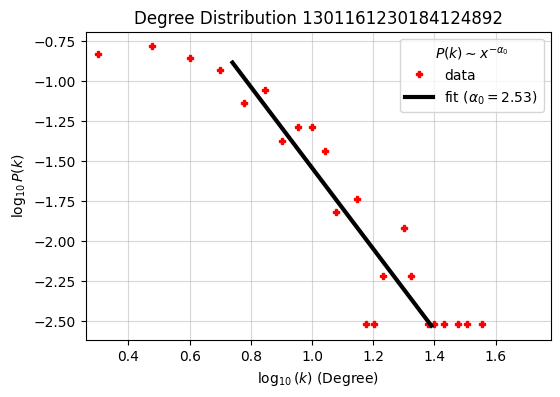

In [7]:
#0.85 & 1.34 -> 3.0
#0.76 & 1.45 -> 2.16

# get_alpha(ruta, id1, 0.74 ,1.39,0.26,1.78, "red", id1)


#### PRUEBA 2 $\rightarrow$ SN

ID: 1203221400724152974

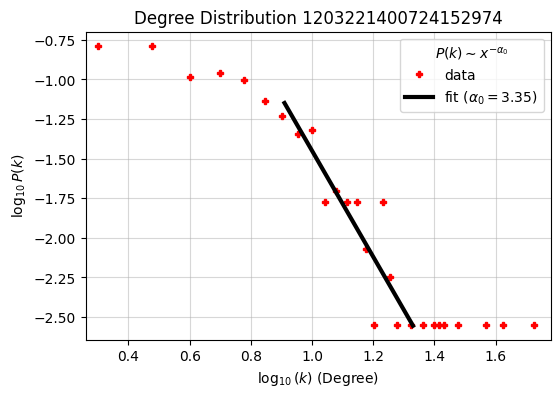

In [8]:
#0.85 & 1.34 -> 3.0
#0.76 & 1.45 -> 2.16

# get_alpha(ruta, id2, 0.91 ,1.33,0.26,1.78, "red", id2)


#### PRUEBA 3 $\rightarrow$ SN

ID: 1106091210774115315

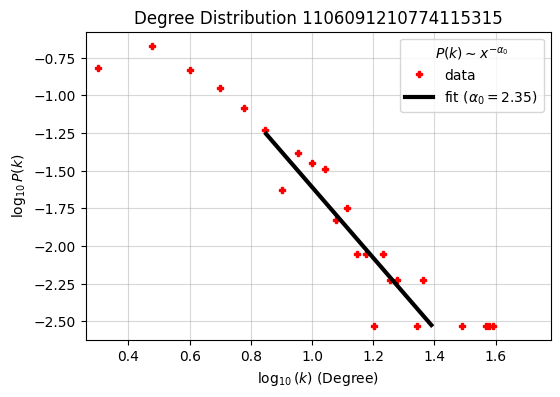

In [9]:

# get_alpha(ruta, id3, 0.85 ,1.39,0.26,1.78, "red", id3)


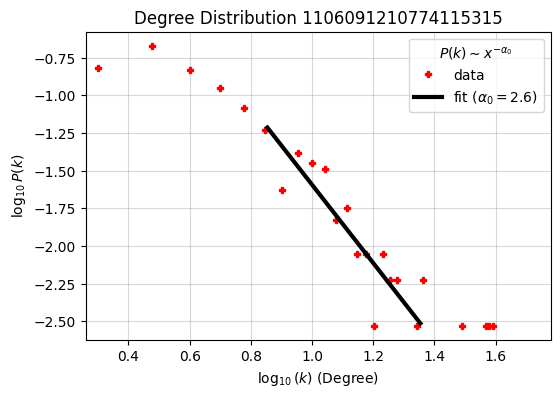

In [10]:

# get_alpha(ruta, id3, 0.854 ,1.354,0.26,1.78, "red", id3)


#### PRUEBA 4 $\rightarrow$ SN

ID: 1603271180634114884

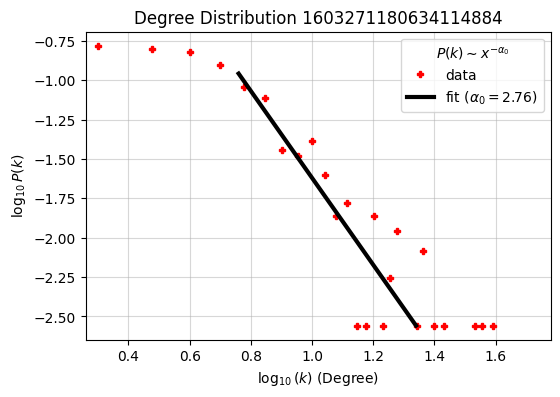

In [11]:

# get_alpha(ruta, id4, 0.76 ,1.34,0.26,1.78, "red", id4)


#### PRUEBA 5 $\rightarrow$ SN

ID: 907301180164117377

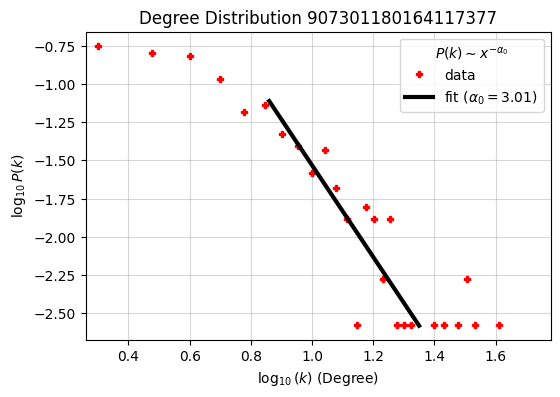

In [12]:

# get_alpha(ruta, id5, 0.86 ,1.35,0.26,1.78, "red", id5)
